In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
import sklearn.cluster as cl
import sklearn.mixture as mi
import sklearn.metrics as met
import sklearn.preprocessing as pp

In [4]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [9]:
def gen_rand(n_data):
  lv=1.6*np.random.random_sample((n_data,1))-0.8
  xv=2*np.random.random_sample((n_data,1))
  yv=-1+(2/3)*np.sin(2*xv*np.pi)+lv

  return (xv,yv)

In [10]:
x_train,y_train=gen_rand(1500)

In [11]:
x_test,y_test=gen_rand(200)

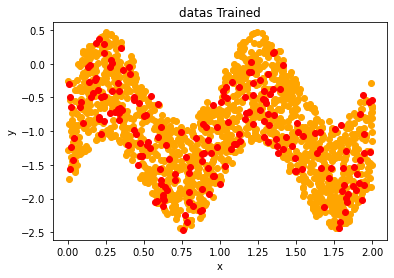

In [12]:
plt.scatter(x_train, y_train, color='orange')
plt.scatter(x_test,y_test, color='red')
plt.title('datas Trained')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

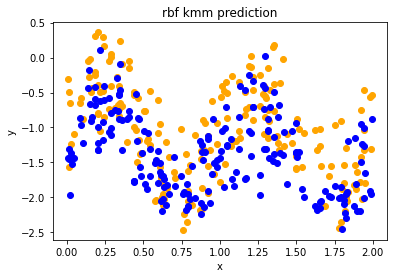

In [21]:
inputs_num=len(x_train) 
num_of_cluster=inputs_num 
r=0.07
epochs=300
w = np.random.random((num_of_cluster,1))
b = np.random.random((1,1))

center = cl.KMeans(n_clusters=num_of_cluster).fit(x_train).cluster_centers_
max_dist = max([np.abs(c1 - c2) for c1 in center for c2 in center])
r_s = np.expand_dims(np.repeat(max_dist / np.sqrt(2*num_of_cluster), num_of_cluster), axis=1)
for epoch in range(epochs):
    for i in range(inputs_num):
      res=np.exp(-np.abs(x_train[i]-center)/np.power(r_s,2))
      outp = np.dot(w.T, res) + b
      error = (outp.reshape(1,1) - y_train[i].reshape(1,1))
      w = w - r * res * error
      b = b - r * error
y_res = []
for i in range(len(x_test)):
    res=np.exp(-np.abs(x_test[i]-center)/np.power(r_s,2))
    outp = np.dot(w.T, res) + b
    y_res.append(outp)       
plt.scatter(x_test, y_test, color="orange")
plt.scatter(x_test,y_res, color="blue")
plt.title('rbf kmm prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


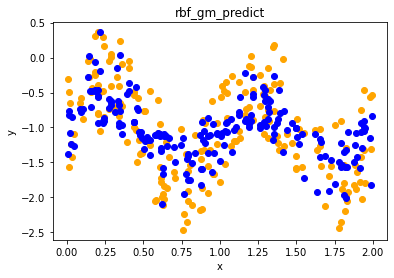

In [22]:
inputs_num=len(x_train)
num_of_cluster=inputs_num
r=0.07
epochs=300
w = np.random.random((num_of_cluster,1))
b = np.random.random((1,1))
gm = mi.GaussianMixture(n_components=num_of_cluster).fit(x_train)
center = []
for i in range(gm.n_components):
  dens = scipy.stats.multivariate_normal(cov=gm.covariances_[i], mean=gm.means_[i]).logpdf(x_train)
  center.append(x_train[np.argmax(dens)])
max_dist = max([np.abs(c1 - c2) for c1 in center for c2 in center])
r_s = np.expand_dims(np.repeat(max_dist / np.sqrt(2*num_of_cluster), num_of_cluster), axis=1)
for epoch in range(epochs):
  for i in range(inputs_num):
    res=np.exp(-np.abs(x_train[i]-center)/np.power(r_s,2))
    outp = np.dot(w.T, res) + b
    error = (outp.reshape(1,1) - y_train[i].reshape(1,1))
    w = w - r * res * error
    b = b - r * error
y_res = []
def calc_test2():
  for i in range(len(x_test)):
    res=np.exp(-np.abs(x_test[i]-center)/np.power(r_s,2))
    outp = np.dot(w.T, res) + b
    y_res.append(outp)
calc_test2();
def plot_test():          
  plt.scatter(x_test, y_test, color="orange")
  plt.scatter(x_test,y_res, color="blue")
  plt.title('rbf_gm_predict')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()
plot_test();

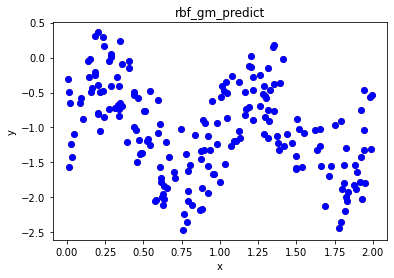

In [28]:
inputs_num=len(x_train) 
num_of_cluster=inputs_num 
r=0.07
epochs=300
w = np.random.random((num_of_cluster,1))
b = np.random.random((1,1))
gm = mi.GaussianMixture(n_components=num_of_cluster).fit(x_train)
center = 2*np.random.random((1500,1))
max_dist = max([np.abs(c1 - c2) for c1 in center for c2 in center])
r_s = np.expand_dims(np.repeat(max_dist / np.sqrt(2*num_of_cluster), num_of_cluster), axis=1)
for epoch in range(epochs):
  for i in range(inputs_num):
    res=np.exp(-np.abs(x_train[i]-center)/np.power(r_s,2))
    outp = np.dot(w.T, res) + b
    error = (outp.reshape(1,1) - y_train[i].reshape(1,1))
    w = w - r * res * error
    b = b - r * error
y_res = []
def calc_test3():
  for i in range(len(x_test)):
    res=np.exp(-np.abs(x_test[i]-center)/np.power(r_s,2))
    outp = np.dot(w.T, res) + b
    y_res.append(outp)
calc_test3();
plt.scatter(x_test, y_test, color="orange")
plt.scatter(x_test,y_test, color="blue")
plt.title('rbf_gm_predict')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

7/7 [==============================] - 0s 938us/step


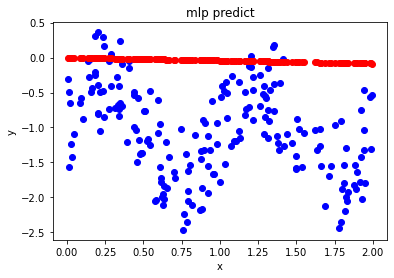

In [25]:
i_layer = Input(shape=(None,1))
layer_s = Dense(30)(i_layer)
layer_s = Activation("relu")(layer_s)
layer_s = Dense(30)(layer_s)
layer_s = Activation("relu")(layer_s)
layer_s = Dense(30)(layer_s)
layer_s = Activation("relu")(layer_s)
layer_s = Dense(1)(layer_s)
model = Model(inputs=i_layer, outputs=layer_s)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x_train, y_train, validation_data=(x_test, y_test) , epochs=300, batch_size=30, verbose=0)
mlp_pred_valid_y = model.predict(x_test)
plt.scatter(x_test, y_test, c="b")
plt.scatter(x_test, mlp_pred_valid_y, c="r")
plt.title('mlp predict')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
